In [25]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv("data_clean.csv")
df.head()

,Series 1
0,2397.167568
1,2371.333300
2,2573.025408
3,NaN
4,2574.872476


In [22]:
len(df)

2517

In [23]:
df = df.interpolate(method='linear', axis=0)
df.head(10)

,Series 1
0,2397.167568
1,2371.333300
2,2573.025408
3,2573.948942
4,2574.872476
5,1769.398592
6,2703.937630
7,2804.961314
8,2786.623682
9,2751.215054


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Series 1  2517 non-null   float64
dtypes: float64(1)
memory usage: 19.8 KB


<AxesSubplot:>

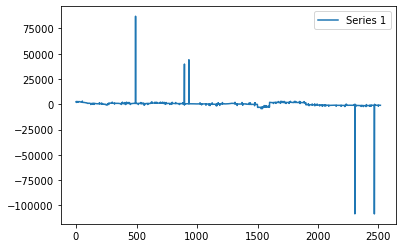

In [16]:
df.plot()

In [50]:
q25, q75 = np.percentile(df["Series 1"].to_list(), 25), np.percentile(df["Series 1"].to_list(), 75)

In [51]:
q25, q75

(-697.0500948086659, 907.892872191334)

In [59]:
k = 1.5
iqr = q75 - q25
cut_off = iqr * k
lower, upper = q25 - cut_off, q75 + cut_off
    
# For comparison, make one array each at varying values of k.
df2 = df.copy()
df2["Series 1"] = df2["Series 1"].apply(lambda x: np.nan if ((x < lower) | (x > upper)) else x)

In [72]:
df2 = df2.interpolate(method='linear', axis=0)

<AxesSubplot:>

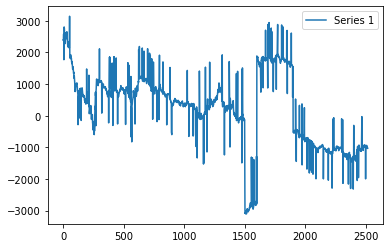

In [73]:
df2.plot()

In [74]:
q25, q75 = np.percentile(df2["Series 1"].to_list(), 25), np.percentile(df2["Series 1"].to_list(), 75)
print(q25, q75)

-693.4907838086659 902.7557781913338


In [81]:
q25, q75 = np.percentile(df2["Series 1"].to_list(), 25), np.percentile(df2["Series 1"].to_list(), 75)
print(q25, q75)
k = 0.5
iqr = q75 - q25
cut_off = iqr * k
lower, upper = q25 - cut_off, q75 + cut_off
    
# For comparison, make one array each at varying values of k.
df3 = df2.copy()
df3["Series 1"] = df3["Series 1"].apply(lambda x: np.nan if ((x < lower) | (x > upper)) else x)

-693.4907838086659 902.7557781913338


In [82]:
df3 = df3.interpolate(method='linear', axis=0)

<AxesSubplot:>

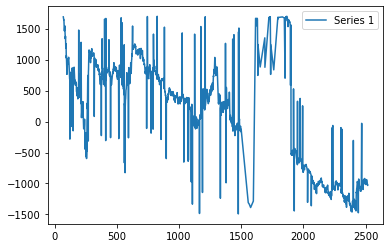

In [83]:
df3.plot()

In [84]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt

In [86]:
sig_fft = fftpack.fft(df2["Series 1"].to_list())